In [28]:
# Load package
library(networkD3)

# Define colors for each timepoint
timepoint_colors <- c(
  "T0" = "#ef7576",
  "T1" = "#87b1d4",
  "T3" = "#90cb8e",
  "T6" = "#c194c8",
  "T12" = "#ffb266"
)

# Create links
links <- data.frame(
  source = c(rep("Collected", 5), rep("Sequenced", 5), rep("QC", 5)),
  target = c(rep("Sequenced", 5), rep("QC", 5), rep("Rarefied", 5)),
  Timepoint = rep(c("T0", "T1", "T3", "T6", "T12"), times = 3),
  value = c(44, 33, 37, 30, 23,   # Collected → Sequenced
            37, 32, 35, 29, 23,   # Sequenced → QC
            37, 31, 34, 28, 20)   # QC → Rarefied
)

# Create a unique node list
nodes <- data.frame(name = unique(c(as.character(links$source), as.character(links$target))))

# Map source/target to indices
links$IDsource <- match(links$source, nodes$name) - 1
links$IDtarget <- match(links$target, nodes$name) - 1

# Add group (used to color the links)
links$group <- links$Timepoint

# Create JS color scale for timepoints
colorJS <- paste0("d3.scaleOrdinal().domain([",
                  paste0("'", names(timepoint_colors), "'", collapse = ", "),
                  "]).range([",
                  paste0("'", timepoint_colors, "'", collapse = ", "),
                  "])")

# Plot Sankey diagram
a <- sankeyNetwork(Links = links, Nodes = nodes,
              Source = "IDsource", Target = "IDtarget",
              Value = "value", NodeID = "name",
              LinkGroup = "group",
              units = "samples", fontSize = 12, nodeWidth = 30,
              colourScale = colorJS)
a

HTML widgets cannot be represented in plain text (need html)

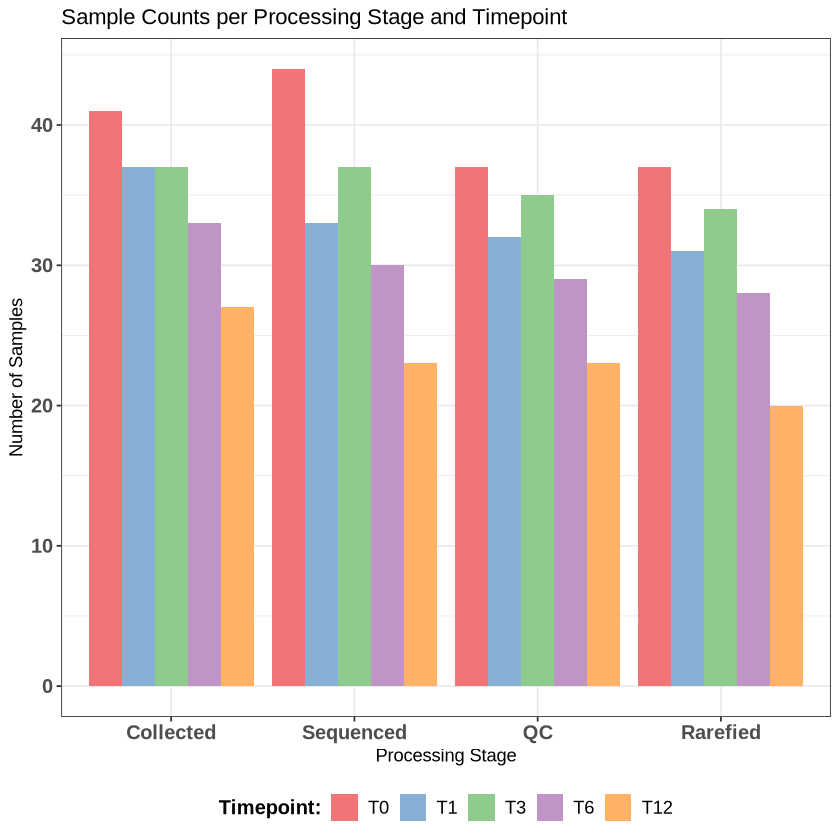

In [21]:
library(tidyverse)

# Create data
df <- tibble(
  Timepoint = c("T0", "T1", "T3", "T6", "T12"),
  Collected = c(41, 37, 37, 33, 27),
  Sequenced = c(44, 33, 37, 30, 23),
  QC = c(37, 32, 35, 29, 23),
  Rarefied = c(37, 31, 34, 28, 20)
) %>%
  pivot_longer(-Timepoint, names_to = "Stage", values_to = "Count")

# Set factor levels for ordering
df$Stage <- factor(df$Stage, levels = c("Collected", "Sequenced", "QC", "Rarefied"))
df$Timepoint <- factor(df$Timepoint, levels = c("T0", "T1", "T3", "T6", "T12"))

# Define custom colors
timepoint_colors <- c(
  "T0" = "#ef7576",
  "T1" = "#87b1d4",
  "T3" = "#90cb8e",
  "T6" = "#c194c8",
  "T12" = "#ffb266"
)

# Plot with custom colors
a <- ggplot(df, aes(x = Stage, y = Count, fill = Timepoint)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Sample Counts per Processing Stage and Timepoint",
       y = "Number of Samples", x = "Processing Stage", fill = "Timepoint:") +
  scale_fill_manual(values = timepoint_colors) +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.title = element_text(size = 12, face = "bold"),
    legend.text = element_text(size = 11),
    axis.text.x = element_text(size = 12, face = "bold"),  # Increase x-axis label size
    axis.text.y = element_text(size = 12, face = "bold")  # Increase x-axis label size

  )

# Print plot
a

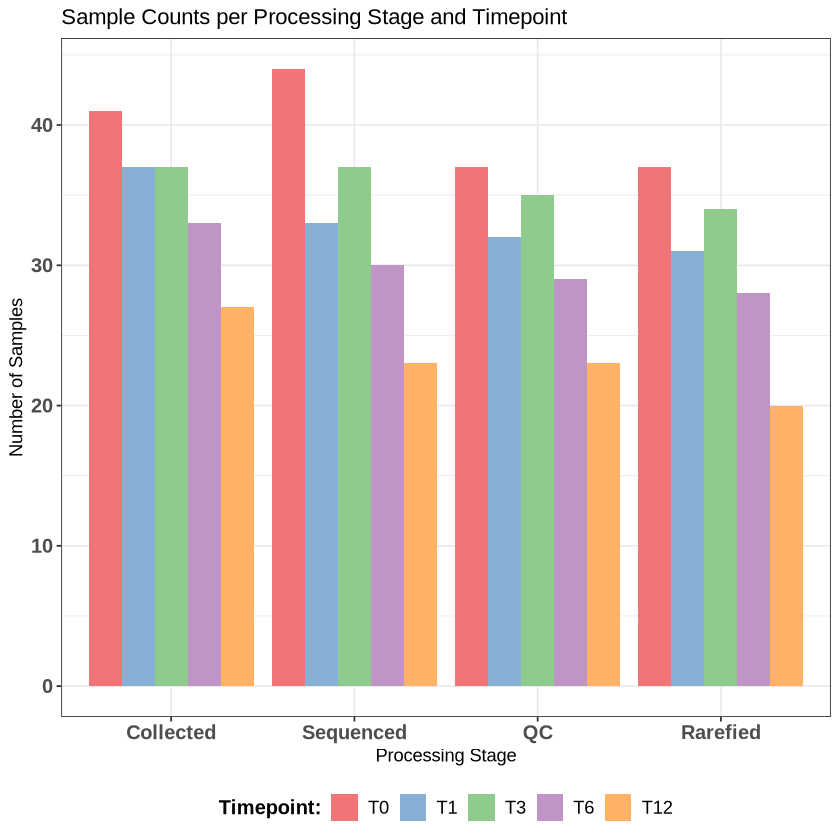

In [22]:
a
ggsave("samples_timepoint_stage.png", plot = a, path = "~/Documents/Collaborations/sinusite_edwin/data", width = 7, height = 8)